# DADOS MNIST

- O conjunto de dados MNIST é um comumente utilizado para começar a trabalhar com a classificação de imagens. Ele contém milhares de pequenas imagens binárias rotuladas de números escritos à mão de 0 a 9, dividida em um conjunto de treinamento e teste.

>  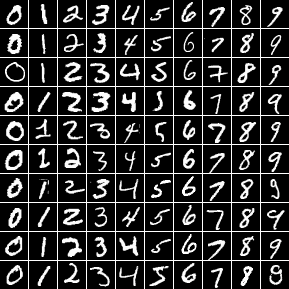




In [2]:
#ver se a GPU está funcionando
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
#Ativar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Arquitetura do linux e da máquina do colab
!uname -a
!cat /etc/lsb-release

Linux 14158c322147 5.10.147+ #1 SMP Sat Dec 10 16:00:40 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=20.04
DISTRIB_CODENAME=focal
DISTRIB_DESCRIPTION="Ubuntu 20.04.5 LTS"


In [5]:
# importar as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense
from keras.optimizers import SGD

In [6]:
# importar o conjunto de dados MNIST
dataset = fetch_openml('mnist_784')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
# Imagens e rótulos
(data, labels) = (dataset.data, dataset.target)

# Exibir algumas informações do dataset MNIST
print("Número de imagens: {}".format(data.shape[0]))
print("Pixels por imagem: {}".format(data.shape[1]))


Número de imagens: 70000
Pixels por imagem: 784


In [8]:
dataset.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


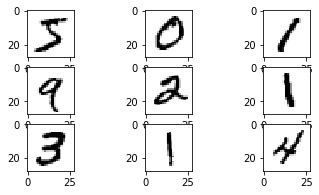

In [9]:
image= dataset.data.to_numpy()

plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(437)
plt.imshow(image[7].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(438)
plt.imshow(image[8].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

plt.subplot(439)
plt.imshow(image[9].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')


In [10]:
# Normalizar todos pixels, de forma que os valores estejam no intervalor [0, 1.0]
data = dataset.data.astype("float") / 255.0
labels = dataset.target

In [11]:
# dividir o dataset entre train e test 
(train_x, test_x, train_y, test_y) = train_test_split(data, labels,  test_size=0.3, train_size=0.7, shuffle= True)

# converter labels de inteiros para vetores
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

In [12]:
train_x.shape, test_x.shape

((49000, 784), (21000, 784))

In [13]:
train_y.shape, test_y.shape

((49000, 10), (21000, 10))

In [14]:
# Dividir os dados de teste entre teste e validação
(teste_x, valid_x, teste_y, valid_y) = train_test_split(test_x, test_y,  test_size=0.5, train_size=0.5, shuffle= True)


In [15]:
teste_x.shape, valid_x.shape

((10500, 784), (10500, 784))

In [16]:
teste_y.shape, valid_y.shape

((10500, 10), (10500, 10))

Dados para treino:

    train_x, train_y


Dados para teste:

    teste_x, teste_y


Dados para validação:

    valid_x, valid_y

- Redimensionar a matriz para se adequar a API do Keras. Ela espera que cada entrada tenha 3 dimensões: uma pra linha, uma para a coluna e uma para a cor. Normalmente, essa 3ª dimensão é usada quando trabalhamos com imagens coloridas e temos múltiplos canais de cor (ex: RGB). Porém, como trabalhamos com imagens monocromáticas, essa terceira dimensão terá apenas um elemento

In [17]:
train_x= np.array(train_x).reshape(-1,28,28,1) #conjunto de treino
teste_x= np.array(teste_x).reshape(-1,28,28,1) #conjunto de teste
valid_x = np.array(valid_x).reshape(-1,28,28,1) #conjunto de validação

- Na área de reconhecimento e classificação de imagens, os melhores resultados são obtidos usando as redes neurais convolucionais.



In [18]:
# Essa é uma arquitetura de rede neural convolucional (CNN) simples que pode ser usada para classificação de imagens. 

# definir a arquitetura da Rede Neural usando Keras
model = keras.models.Sequential([
layers.Conv2D(filters=25, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)), # para extrair características das imagens de entrada, c 25 filtros
layers.MaxPooling2D((2,2)), # diminuir o tamanho da representação da imagem, mantendo as características mais relevantes
layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), # para extrair características das imagens de entrada, c 64 filtros
layers.MaxPooling2D((2,2)), # diminuir o tamanho da representação da imagem, mantendo as características mais relevantes
layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'), # para extrair características das imagens de entrada, c 64 filtros
layers.MaxPooling2D((2, 2)), # diminuir o tamanho da representação da imagem, mantendo as características mais relevantes
layers.Flatten(), # transforma a saida em um vetor unidimensional. 
layers.Dense(64,activation='relu'), # Responsável por aprender 
layers.Dense(10,activation='softmax')] # Responsável por aprender 
)

In [19]:
# treinar o modelo usando o otimizador adam
print("Treinando a rede neural...")

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

resultado = model.fit(train_x, train_y, batch_size=128, epochs=10, verbose=2, validation_data=(teste_x, teste_y))

Treinando a rede neural...
Epoch 1/10
383/383 - 7s - loss: 0.3963 - accuracy: 0.8778 - val_loss: 0.1359 - val_accuracy: 0.9564 - 7s/epoch - 18ms/step
Epoch 2/10
383/383 - 2s - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.0893 - val_accuracy: 0.9724 - 2s/epoch - 5ms/step
Epoch 3/10
383/383 - 2s - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0860 - val_accuracy: 0.9736 - 2s/epoch - 5ms/step
Epoch 4/10
383/383 - 2s - loss: 0.0655 - accuracy: 0.9793 - val_loss: 0.0891 - val_accuracy: 0.9724 - 2s/epoch - 5ms/step
Epoch 5/10
383/383 - 2s - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.0666 - val_accuracy: 0.9792 - 2s/epoch - 5ms/step
Epoch 6/10
383/383 - 2s - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0707 - val_accuracy: 0.9782 - 2s/epoch - 5ms/step
Epoch 7/10
383/383 - 2s - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0621 - val_accuracy: 0.9811 - 2s/epoch - 5ms/step
Epoch 8/10
383/383 - 2s - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0689 - val_accuracy: 0.9790 - 2s/epoch - 6ms/s

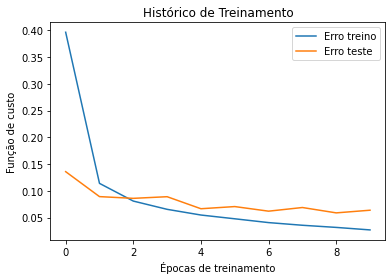

In [20]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

## Agora iremos usar só os dados de validação

In [36]:
# avaliar a Rede Neural
print("Avaliando a rede neural...")
predictions = model.predict(valid_x, batch_size=128)
print(classification_report(valid_y.argmax(axis=1), predictions.argmax(axis=1)))

Avaliando a rede neural...
83/83 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1050
           1       1.00      0.99      1.00      1203
           2       0.98      0.98      0.98      1070
           3       0.98      0.99      0.99      1035
           4       0.97      0.99      0.98      1058
           5       0.96      0.99      0.97       931
           6       0.99      0.98      0.99      1012
           7       0.98      0.99      0.98      1082
           8       1.00      0.94      0.97      1011
           9       0.98      0.98      0.98      1048

    accuracy                           0.98     10500
   macro avg       0.98      0.98      0.98     10500
weighted avg       0.98      0.98      0.98     10500



In [22]:
model.evaluate(valid_x,valid_y)

329/329 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9821


[0.060324788093566895, 0.9820952415466309]

In [23]:
y_predicted = model.predict(valid_x)

329/329 [==============================] - 1s 2ms/step


In [24]:
y_predicted[0]

array([9.99827385e-01, 5.56699374e-11, 7.72888384e-08, 4.30864899e-10,
       6.12065560e-06, 6.11240623e-08, 1.22594646e-08, 1.25828121e-08,
       2.15096795e-11, 1.66228463e-04], dtype=float32)

Valor predito:  0


Valor rotulado:  0




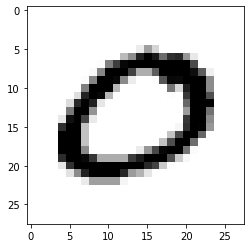

In [25]:
print('Valor predito: ', np.argmax(y_predicted[0]))
print('\n')
print('Valor rotulado: ', np.argmax(valid_y[0]))
print('\n')
plt.imshow((valid_x[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')

Valor predito:  9


Valor rotulado:  9




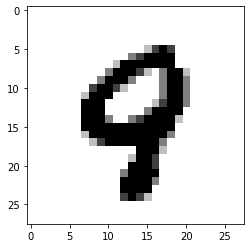

In [26]:
print('Valor predito: ', np.argmax(y_predicted[1]))
print('\n')
print('Valor rotulado: ', np.argmax(valid_y[1]))
print('\n')
plt.imshow((valid_x[1].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')

Valor predito:  0


Valor rotulado:  0




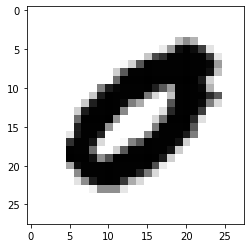

In [27]:
print('Valor predito: ', np.argmax(y_predicted[6]))
print('\n')
print('Valor rotulado: ', np.argmax(valid_y[6]))
print('\n')
plt.imshow((valid_x[6].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [28]:
len(y_predicted), len(valid_y)

(10500, 10500)